In [1]:
%load_ext lab_black
import pandas_datareader as pdr
import datetime as dt

## MACD - Moving Average Convergence Divergence
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default), 8-17-9 MACD (more responsive))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

**Signal**
- MACD > Signal line

In [2]:
ticker = "BTC-USD"
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(ticker, start)

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4.661841e+09,3742.700439
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
...,...,...,...,...,...,...
2021-04-01,60267.187500,58869.281250,59098.878906,59384.312500,5.872786e+10,59384.312500
2021-04-02,60110.269531,57603.890625,59397.410156,57603.890625,5.964134e+10,57603.890625
2021-04-03,58913.746094,57168.675781,57604.839844,58758.554688,5.074966e+10,58758.554688


In [4]:
exp1 = data["Adj Close"].ewm(span=12, adjust=False).mean()
exp2 = data["Adj Close"].ewm(span=26, adjust=False).mean()
data["MACD"] = exp1 - exp2
data["Signal line"] = data["MACD"].ewm(span=9, adjust=False).mean()

In [5]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line
Date,,,,,,,,
2021-04-01,60267.187500,58869.281250,59098.878906,59384.312500,5.872786e+10,59384.312500,1573.650278,1489.032634
2021-04-02,60110.269531,57603.890625,59397.410156,57603.890625,5.964134e+10,57603.890625,1476.455099,1486.517127
2021-04-03,58913.746094,57168.675781,57604.839844,58758.554688,5.074966e+10,58758.554688,1475.589284,1484.331559
2021-04-04,59891.296875,57694.824219,58760.875000,59057.878906,6.070627e+10,59057.878906,1481.972823,1483.859811
2021-04-07,58369.187500,57609.480469,57801.023438,57805.460938,6.600750e+10,57805.460938,1370.177605,1461.123370


<AxesSubplot:label='27f9b78d-1c41-4a64-8c6c-db9dabe0258e'>

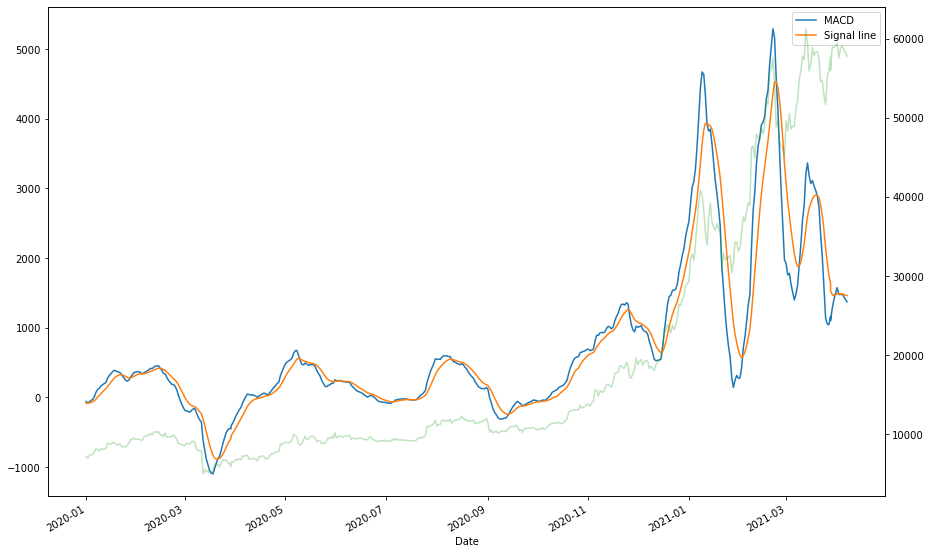

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
data[["MACD", "Signal line"]].loc["2020-01-01":].plot(ax=ax)
data["Close"].loc["2020-01-01":].plot(ax=ax, secondary_y=True, alpha=0.3)

In [13]:
data = data.loc["2020-01-01":]
data

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line
Date,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,-61.114299,-85.231483
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,-79.166603,-84.018507
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,-63.736756,-79.962157
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,-45.674693,-73.104664
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,-30.950295,-64.673790
...,...,...,...,...,...,...,...,...
2021-04-01,60267.187500,58869.281250,59098.878906,59384.312500,5.872786e+10,59384.312500,1573.650278,1489.032634
2021-04-02,60110.269531,57603.890625,59397.410156,57603.890625,5.964134e+10,57603.890625,1476.455099,1486.517127
2021-04-03,58913.746094,57168.675781,57604.839844,58758.554688,5.074966e+10,58758.554688,1475.589284,1484.331559


In [18]:
data = data.iloc[::-1]
data

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line
Date,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,-61.114299,-85.231483
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,-79.166603,-84.018507
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,-63.736756,-79.962157
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,-45.674693,-73.104664
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,-30.950295,-64.673790
...,...,...,...,...,...,...,...,...
2021-04-01,60267.187500,58869.281250,59098.878906,59384.312500,5.872786e+10,59384.312500,1573.650278,1489.032634
2021-04-02,60110.269531,57603.890625,59397.410156,57603.890625,5.964134e+10,57603.890625,1476.455099,1486.517127
2021-04-03,58913.746094,57168.675781,57604.839844,58758.554688,5.074966e+10,58758.554688,1475.589284,1484.331559


In [19]:
data[["Close", "MACD", "Signal line"]]

,Close,MACD,Signal line
Date,,,
2020-01-01,7200.174316,-61.114299,-85.231483
2020-01-02,6985.470215,-79.166603,-84.018507
2020-01-03,7344.884277,-63.736756,-79.962157
2020-01-04,7410.656738,-45.674693,-73.104664
2020-01-05,7411.317383,-30.950295,-64.673790
...,...,...,...
2021-04-01,59384.312500,1573.650278,1489.032634
2021-04-02,57603.890625,1476.455099,1486.517127
2021-04-03,58758.554688,1475.589284,1484.331559


In [31]:
import numpy as np

df = data
df["difference"] = df["MACD"] - df["Signal line"]

df["cross"] = np.sign(df.difference.shift(1)) != np.sign(df.difference)
# np.sum(df.cross) - 1
df = df.loc[df["cross"] == True]
# df
df[["Close", "MACD", "Signal line"]]

,Close,MACD,Signal line
Date,,,
2020-01-01,7200.174316,-61.114299,-85.231483
2020-01-23,8406.515625,306.417546,321.150814
2020-01-28,9358.589844,291.624002,280.577811
2020-02-04,9180.962891,335.238462,337.327331
2020-02-05,9613.423828,349.319148,339.725694
2020-02-15,9889.424805,417.234601,418.973875
2020-03-21,6185.066406,-882.676172,-885.325692
2020-05-10,8601.795898,523.389632,551.473892
2020-05-31,10167.268555,251.991703,230.617677


## Strategy

1. Find the crossing point of MACD and signal line
2. Buying only when the trend is increasing
3. Selling only whne the trend is decreasing 

In [60]:
start_time = "2020-01-02"
i = 0
profit = 0
records = []
for index, row in df.iterrows():
    day = index.strftime("%b-%d-%Y")
    if i % 2 == 0:
        if row["MACD"] > row["Signal line"]:  # Buying when the trend is increasing
            profit -= row["Close"]
            print(
                f"Buying 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
            )
            records.append(["Buying", -round(row["Close"]), round(profit), day])
    else:
        if row["MACD"] < row["Signal line"]:  # Selling when the trend is decreasing
            profit += row["Close"]
            print(
                f"Selling 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
            )
            records.append(["Selling", round(row["Close"]), round(profit), day])
    i += 1
print(f"\nTotal profit: {round(profit)}")
# df.loc[start_time:]
# records

Buying 1 BTC @ USD 7200, total profit: -7200 on Jan-01-2020
Selling 1 BTC @ USD 8407, total profit: 1206 on Jan-23-2020
Buying 1 BTC @ USD 9359, total profit: -8152 on Jan-28-2020
Selling 1 BTC @ USD 9181, total profit: 1029 on Feb-04-2020
Buying 1 BTC @ USD 9613, total profit: -8585 on Feb-05-2020
Selling 1 BTC @ USD 9889, total profit: 1305 on Feb-15-2020
Buying 1 BTC @ USD 6185, total profit: -4880 on Mar-21-2020
Selling 1 BTC @ USD 8602, total profit: 3721 on May-10-2020
Buying 1 BTC @ USD 10167, total profit: -6446 on May-31-2020
Selling 1 BTC @ USD 9666, total profit: 3220 on Jun-04-2020
Buying 1 BTC @ USD 9252, total profit: -6033 on Jul-06-2020
Selling 1 BTC @ USD 9132, total profit: 3100 on Jul-15-2020
Buying 1 BTC @ USD 9375, total profit: -6275 on Jul-20-2020
Selling 1 BTC @ USD 11411, total profit: 5135 on Aug-10-2020
Buying 1 BTC @ USD 10797, total profit: -5662 on Sep-14-2020
Selling 1 BTC @ USD 10226, total profit: 4564 on Sep-22-2020
Buying 1 BTC @ USD 10746, total prof

In [67]:
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
records_df

Total profit: USD 37,812



,Action,Price,Profit,Day
0,Buying,-7200,-7200,Jan-01-2020
1,Selling,8407,1206,Jan-23-2020
2,Buying,-9359,-8152,Jan-28-2020
3,Selling,9181,1029,Feb-04-2020
4,Buying,-9613,-8585,Feb-05-2020
5,Selling,9889,1305,Feb-15-2020
6,Buying,-6185,-4880,Mar-21-2020
7,Selling,8602,3721,May-10-2020
8,Buying,-10167,-6446,May-31-2020
9,Selling,9666,3220,Jun-04-2020


In [15]:
import pandas as pd

writer = pd.ExcelWriter(
    "technical.xlsx",
    engine="xlsxwriter",
    date_format="yyyy-mm-dd",
    datetime_format="yyyy-mm-dd",
)

sheet_name = "MACD"
data[["Close", "MACD", "Signal line"]].to_excel(writer, sheet_name=sheet_name)

worksheet = writer.sheets[sheet_name]
workbook = writer.book

# Create a format for a green cell
green_cell = workbook.add_format({"bg_color": "#C6EFCE", "font_color": "#006100"})

# Create a format for a red cell
red_cell = workbook.add_format({"bg_color": "#FFC7CE", "font_color": "#9C0006"})


# Set column width of Date
worksheet.set_column(0, 0, 15)

for col in range(1, 4):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(
        1,
        col,
        len(data),
        col,
        {"type": "formula", "criteria": "=C2>=D2", "format": green_cell},
    )

    # Create a conditional formatted of type formula
    worksheet.conditional_format(
        1,
        col,
        len(data),
        col,
        {"type": "formula", "criteria": "=C2<D2", "format": red_cell},
    )


# Create a new chart object.
chart1 = workbook.add_chart({"type": "line"})

# Add a series to the chart.
chart1.add_series(
    {
        "name": "MACD",
        "categories": [sheet_name, 1, 0, len(data), 0],
        "values": [sheet_name, 1, 2, len(data), 2],
    }
)

# Create a new chart object.
chart2 = workbook.add_chart({"type": "line"})

# Add a series to the chart.
chart2.add_series(
    {
        "name": "Signal line",
        "categories": [sheet_name, 1, 0, len(data), 0],
        "values": [sheet_name, 1, 3, len(data), 3],
    }
)

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({"name": sheet_name + " " + ticker})
chart1.set_x_axis({"name": "Date"})
chart1.set_y_axis({"name": "MACD"})


# To set the labels on x axis not on 0
chart1.set_x_axis({"label_position": "low", "num_font": {"rotation": 45}})

# Insert the chart into the worksheet.
worksheet.insert_chart("F2", chart1)


writer.close()